In [67]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv("/content/BTC-USD.csv", parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a datetime
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-01,387.427002,391.378998,380.779999,383.614990,383.614990,26229400.0
2014-10-02,383.988007,385.497009,372.946014,375.071991,375.071991,21777700.0
2014-10-03,375.181000,377.695007,357.859009,359.511993,359.511993,30901200.0
2014-10-04,359.891998,364.487000,325.885986,328.865997,328.865997,47236500.0
2014-10-05,328.915985,341.800995,289.295990,320.510010,320.510010,83308096.0


In [68]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"})
bitcoin_prices

,Price
Date,
2014-10-01,383.614990
2014-10-02,375.071991
2014-10-03,359.511993
2014-10-04,328.865997
2014-10-05,320.510010
...,...
2023-10-26,34156.648440
2023-10-27,33909.800780
2023-10-28,34089.574220


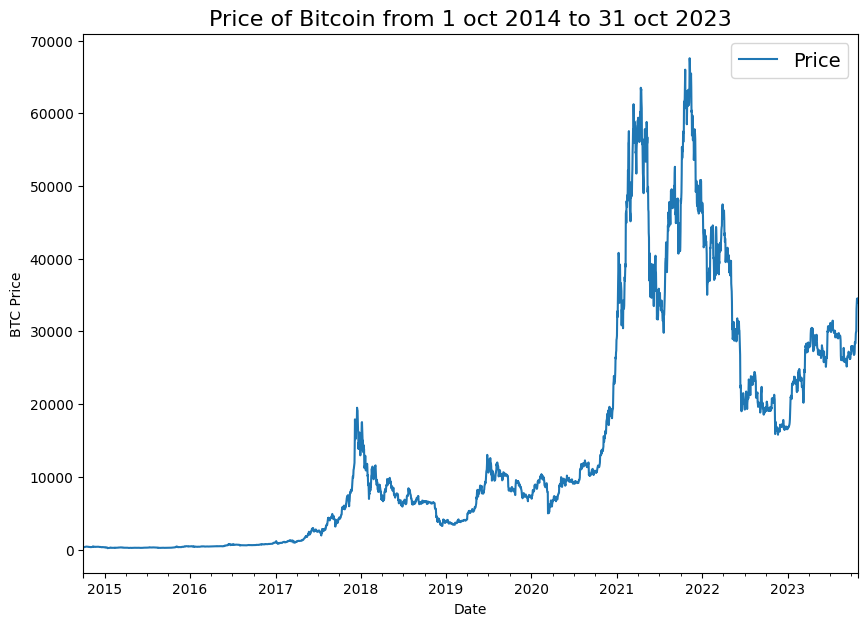

In [69]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2014 to 31 oct 2023", fontsize=16)
plt.legend(fontsize=14);

In [70]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC-USD.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%m/%d/%Y")) # get the dates as dates (not strings), strptime = string parse time
    btc_price.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2014, 10, 1, 0, 0),
  datetime.datetime(2014, 10, 2, 0, 0),
  datetime.datetime(2014, 10, 3, 0, 0),
  datetime.datetime(2014, 10, 4, 0, 0),
  datetime.datetime(2014, 10, 5, 0, 0),
  datetime.datetime(2014, 10, 6, 0, 0),
  datetime.datetime(2014, 10, 7, 0, 0),
  datetime.datetime(2014, 10, 8, 0, 0),
  datetime.datetime(2014, 10, 9, 0, 0),
  datetime.datetime(2014, 10, 10, 0, 0)],
 [383.61499,
  375.071991,
  359.511993,
  328.865997,
  320.51001,
  330.07901,
  336.187012,
  352.940002,
  365.026001,
  361.562012])

Text(0.5, 0, 'Date')

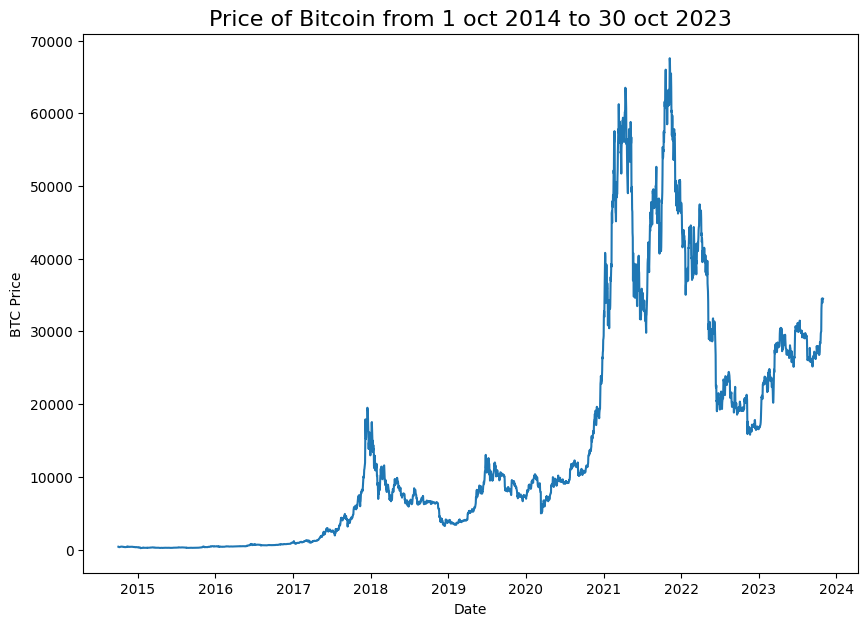

In [71]:
# Plot from CSV
import matplotlib.pyplot as plt
#import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 oct 2014 to 30 oct 2023", fontsize=16)
plt.xlabel("Date")

In [72]:
# Get bitcoin data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-10-01T00:00:00.000000000', '2014-10-02T00:00:00.000000000',
        '2014-10-03T00:00:00.000000000', '2014-10-04T00:00:00.000000000',
        '2014-10-05T00:00:00.000000000', '2014-10-06T00:00:00.000000000',
        '2014-10-07T00:00:00.000000000', '2014-10-08T00:00:00.000000000',
        '2014-10-09T00:00:00.000000000', '2014-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([383.61499 , 375.071991, 359.511993, 328.865997, 320.51001 ,
        330.07901 , 336.187012, 352.940002, 365.026001, 361.562012]))

In [73]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test - you can change these values as needed, e.g. 90/10, 95/5

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2653, 664, 2653, 664)

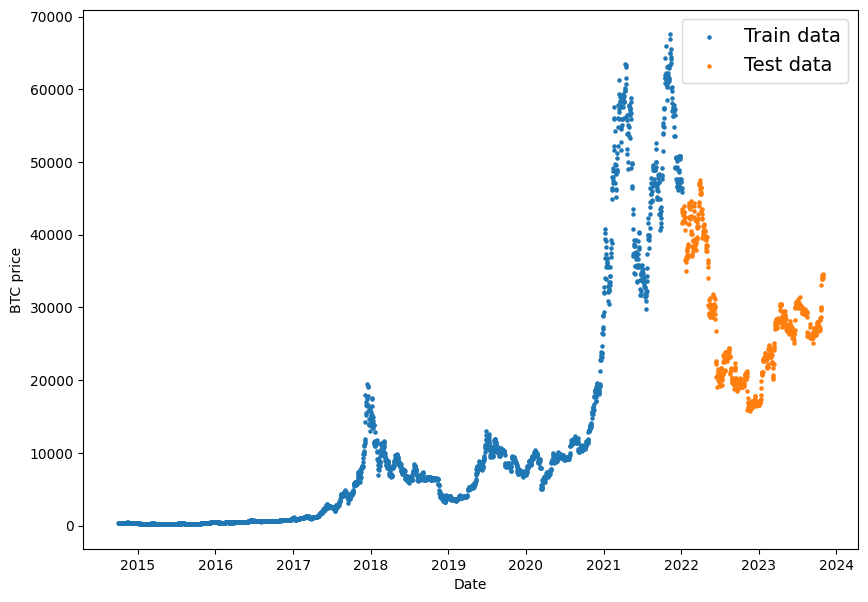

In [74]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show();

In [75]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  __________
  timesteps: array of timestep values
  values: array of values across time
  format: style of plot, default "."
  start: where to start the plot (setting a value will index from start of timesteps & values)
  end: where to end the plot (similar to start but for the end)
  label: label to show on plot about values, default None
  """
  # Plot the series

  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

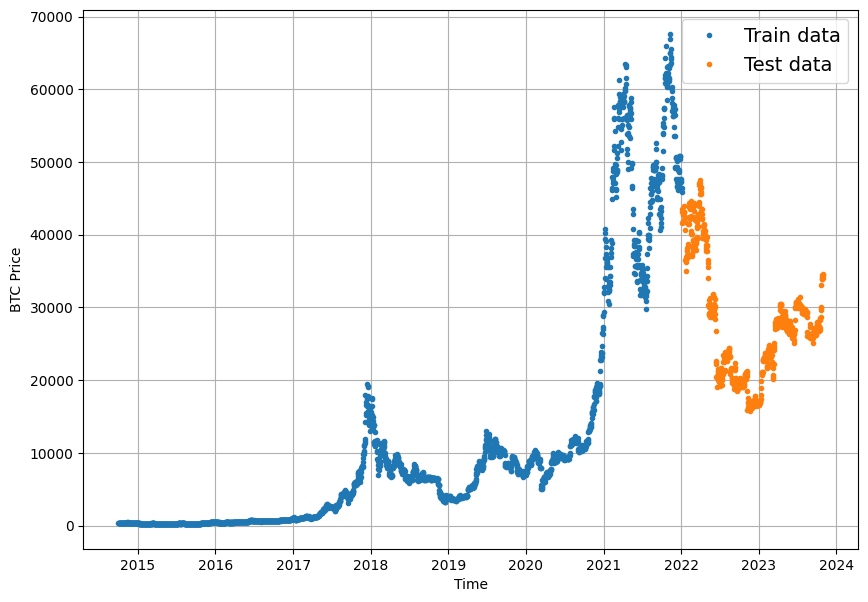

In [76]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [77]:
import tensorflow as tf
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)
  return mae / mae_naive_no_season

In [78]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
  # Make sure float32 datatype (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [79]:
# Let's setup global variables for window and horizon size
HORIZON = 1   # predict next 1 day
WINDOW_SIZE = 7   # use the past week of Bitcoin data to make the prediction

In [80]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=HORIZON):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1
  Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])
  """
  return x[:, :-HORIZON], x[:, -horizon:]

In [81]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} ->, Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] ->, Label: 7


In [82]:
import numpy as np
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turn a 1D array into a 2D array of sequential labelled windows of window_size with horizon size labels.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for labelling later)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  #print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  # 3. Index on the target array (a time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]
  #print(windowed_array)

  # 4. Get the labelled windows
  windows, labels, = get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [83]:
full_windows, full_labels  = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3310, 3310)

In [84]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [85]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2648, 662, 2648, 662)

In [86]:
# Check to see if train labels are the same (before and after window split)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [87]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor="val_loss",
                                            verbose=0, # only output a limted amount of text
                                            save_best_only=True)

In [88]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed for as reproducible results as possible
tf.random.set_seed(42)

# 1. Construct model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")  # linear activation is the same as having no activation
], name="model_1_dense")  # name our model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
21/21 [==============================] - 2s 44ms/step - loss: 8950.2686 - mae: 8950.2686 - mse: 281385696.0000 - val_loss: 5598.8691 - val_mae: 5598.8691 - val_mse: 35649988.0000
Epoch 2/100
21/21 [==============================] - 1s 41ms/step - loss: 1177.9242 - mae: 1177.9242 - mse: 6257811.0000 - val_loss: 1415.6917 - val_mae: 1415.6917 - val_mse: 3439940.5000
Epoch 3/100
21/21 [==============================] - 1s 39ms/step - loss: 697.3063 - mae: 697.3063 - mse: 2336222.0000 - val_loss: 1029.4702 - val_mae: 1029.4702 - val_mse: 2417931.0000
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 608.5177 - mae: 608.5177 - mse: 1852273.8750 - val_loss: 1040.6552 - val_mae: 1040.6552 - val_mse: 2409061.0000
Epoch 5/100
21/21 [==============================] - 1s 40ms/step - loss: 583.8782 - mae: 583.8782 - mse: 1683408.0000 - val_loss: 983.9666 - val_mae: 983.9666 - val_mse: 2216017.5000
Epoch 6/100
21/21 [==============================] - 0s 6ms/step -

In [89]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 1s 4ms/step - loss: 540.6458 - mae: 540.6458 - mse: 731219.7500


[540.6458129882812, 540.6458129882812, 731219.75]

In [91]:
def make_preds(model, input_data):
  """
  Uses model to make predictions input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)  # return 1D array of predictions

In [92]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

21/21 [==============================] - 0s 2ms/step


(662,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([43141.86 , 41579.72 , 41475.21 , 41709.234, 41597.414, 42543.85 ,
        43740.67 , 42738.688, 43073.71 , 43217.33 ], dtype=float32)>)

In [93]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 540.6459,
 'mse': 731219.94,
 'rmse': 855.114,
 'mape': 1.9442979,
 'mase': 1.0194703}